In [1]:
#importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Importing and setting up the datasets

In [2]:
df = pd.read_csv("cleaned_dataset.csv")

In [3]:
#setting pandas to show all columns of the dataframe without truncation
pd.set_option('display.max_columns', None)

In [4]:
#checking the main dataframe
df.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,Time_bin,Manufactured_year,Age,Year_month,Date_time,Delay_status
0,2007,9,27,4,1104,1105,1243,1255,WN,110,N741SA,99.0,110.0,82.0,-12.0,-1.0,SEA,SMF,605,5,12,0,0,0,0,0,10am - 12pm,1998,9,2007-09,2007-09-27 11:05:00,0
1,2007,11,20,2,2120,2120,2255,2308,EV,4304,N355CA,95.0,108.0,67.0,-13.0,0.0,ATL,CLE,554,10,18,0,0,0,0,0,8pm - 10pm,2002,5,2007-11,2007-11-20 21:20:00,0
2,2007,7,16,1,1025,1030,1127,1133,OO,5799,N284YV,62.0,63.0,54.0,-6.0,-5.0,PDX,MFR,222,2,6,0,0,0,0,0,10am - 12pm,1994,13,2007-07,2007-07-16 10:30:00,0
3,2007,8,5,7,1448,1453,1529,1538,AQ,94,N837AL,41.0,45.0,32.0,-9.0,-5.0,HNL,KOA,163,2,7,0,0,0,0,0,2pm - 4pm,1985,22,2007-08,2007-08-05 14:53:00,0
4,2006,12,10,7,2027,1921,2235,2138,OO,6704,N943SW,68.0,77.0,55.0,57.0,66.0,DEN,LNK,423,3,10,0,0,0,0,57,6pm - 8pm,2003,3,2006-12,2006-12-10 19:21:00,1


### Q2) Do older planes suffer more delays?

In [5]:
#keeping the necessary columns
q2 = df.iloc[:,np.array([14,28])]
q2.head()

,ArrDelay,Age
0,-12.0,9
1,-13.0,5
2,-6.0,13
3,-9.0,22
4,57.0,3


In [6]:
#checking the number of planes in each age
q2['Age'].value_counts()

5     486458
6     482752
7     437370
4     433324
3     406478
8     386995
2     321646
9     262896
1     251125
19    183422
10    180840
16    177839
15    177015
11    175115
18    163069
17    157324
12    152985
14    147337
20    138650
13    135577
21    124815
0      83431
22     82872
23     25941
39     25672
38     23759
24     14557
28     13783
31     12325
27     12278
37     10458
29     10257
40      9992
30      9453
32      7041
26      4611
25      3373
33      2652
34      2261
36      2219
44      1512
43      1506
41      1463
42      1316
47      1301
48      1182
35       754
45       694
50       551
49       475
51       125
Name: Age, dtype: int64

In [7]:
#getting the average delay of planes, for each year of age of the planes
grouped_delay = q2.groupby('Age', as_index=False).agg(Avg_delay=('ArrDelay', 'mean'),
                                                          Standard_deviation=('ArrDelay', 'std'))
#Getting the max delays of each year of age of the planes, within one standard deviation above the mean
grouped_delay['Max_delay'] = (grouped_delay['Avg_delay'] + grouped_delay['Standard_deviation'])

In [8]:
#checking the grouped delays
grouped_delay.head(50)

,Age,Avg_delay,Standard_deviation,Max_delay
0,0,9.066462,39.387972,48.454434
1,1,8.916002,37.414468,46.330470
2,2,9.385203,37.756053,47.141256
3,3,9.148719,37.608393,46.757112
4,4,10.165904,39.318909,49.484813
5,5,9.074202,37.357233,46.431434
6,6,8.594823,36.801149,45.395972
7,7,9.194803,37.841943,47.036746
8,8,9.587881,38.326289,47.914170
9,9,10.175735,39.080735,49.256470


In [9]:
#getting a colour-blind friendly, colour palette
sns.reset_orig()
my_palette = sns.color_palette("colorblind")
plt.style.use('seaborn-colorblind')

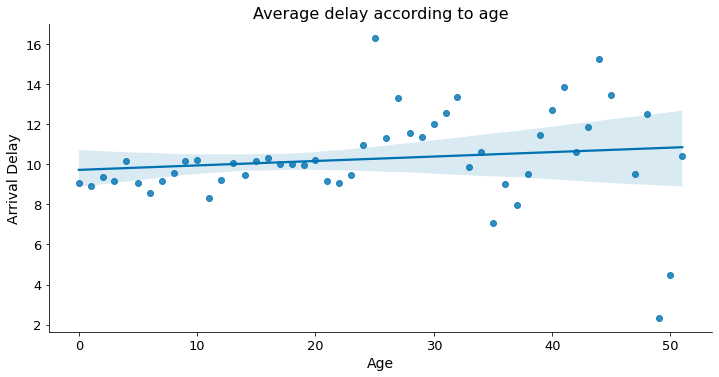

In [10]:
#plotting the relationship between age and average delays 

sns.lmplot(x='Age', y='Avg_delay', data=grouped_delay, aspect = 2, height = 5, palette = "my_palette")

plt.title("Average delay according to age",size = 16)
plt.xticks(fontsize =13)
plt.yticks(fontsize =13)

plt.xlabel("Age", fontsize = 14)
plt.ylabel("Arrival Delay", fontsize = 14)


plt.savefig("Average delays according to planes' age.png", bbox_inches = 'tight')
plt.show()

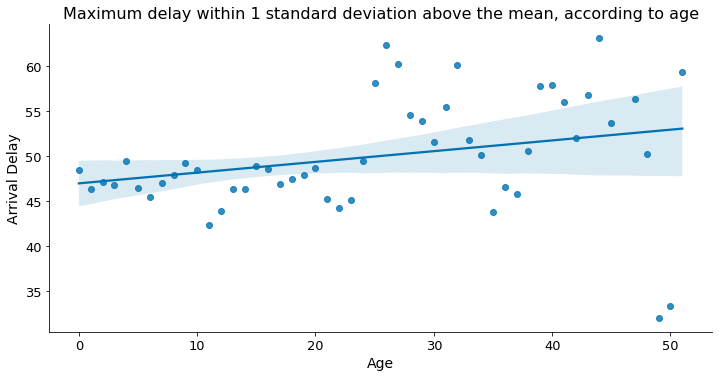

In [11]:
#plotting the relationship between age and maximum delays within 1 standard deviation above the mean

sns.lmplot(x='Age', y='Max_delay', data=grouped_delay, aspect = 2, height = 5, palette = "my_palette")

plt.title("Maximum delay within 1 standard deviation above the mean, according to age",size = 16)
plt.xticks(fontsize =13)
plt.yticks(fontsize =13)

plt.xlabel("Age", fontsize = 14)
plt.ylabel("Arrival Delay", fontsize = 14)


plt.savefig("Maximum delays according to planes' age.png", bbox_inches = 'tight')
plt.show()

In [12]:
#average delay for old planes
q2[q2['Age']>=25]['ArrDelay'].mean()

11.384540378727184

In [13]:
#average delay for new planes
q2[q2['Age']<25]['ArrDelay'].mean()

9.476706906986308

In [14]:
#maximum delay within 1 standard deviation above the mean for old planes
max_delay_old = q2[q2['Age']>=25]['ArrDelay'].mean() + q2[q2['Age']>=25]['ArrDelay'].std()
print(max_delay_old)

54.79458326861547


In [15]:
#maximum delay within 1 standard deviation above the mean for new planes
max_delay_new = q2[q2['Age']<25]['ArrDelay'].mean() + q2[q2['Age']<25]['ArrDelay'].std()
print(max_delay_new)

47.07866840819136
